**Prática de Realce e detecção de borda**

Exercícios retirados de:
http://homepages.inf.ed.ac.uk/rbf/HIPR2/featops.htm



In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Copiamos a funcao do lab04 
def apply_gaussian_filter(img, sigma, size=5):
    def gauss(x, y, sigma):
        factor = 1 / (2 * np.pi * sigma**2)
        return factor * np.exp(-(x**2 + y**2) / (2 * sigma**2))

    mask = np.zeros((size, size))
    center = size // 2
    for x in range(size):
        for y in range(size):
            x_dist = x - center
            y_dist = y - center
            mask[x, y] = gauss(x_dist, y_dist, sigma)

    mask /= np.sum(mask)
    row, col = img.shape
    new_img = np.zeros((row, col))
    pad_image = np.pad(img, (center, center), mode='constant', constant_values=0)
    for i in range(row):
        for j in range(col):
            neighbors = pad_image[i:i+size, j:j+size]
            new_img[i, j] = np.sum(neighbors * mask)
    
    return new_img

1) Aplique os filtros  Sobel e Roberts nas imagens abaixo. Mostre, para o caso do Sobel, uma imagem representando a derivada em x e outra imagem representando a derivada em y

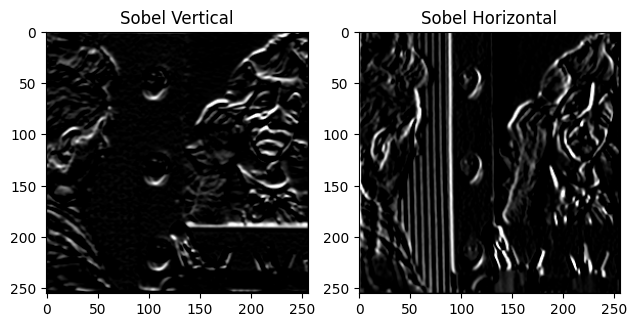

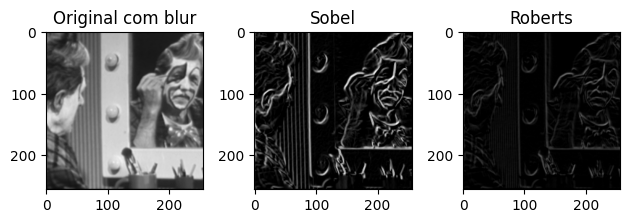

In [52]:
import cv2
import matplotlib.pyplot as plt
import numpy as np



def conv(dimension:int, img, operator):
    new_img = img.copy()
    dxy = int(dimension // 2) # mediana do valor (mcc pura)
    rows, cols = img.shape
    padded_image = np.pad(img, (dxy, dxy), mode='constant', constant_values=0)
    for i in range(rows):
        for j in range(cols):
            neighbors = padded_image[i:i+dimension, j:j+dimension]
            new_img[i,j] = np.sum(neighbors*operator)
    new_img[new_img > 255] =  255
    new_img[new_img < 0] = 0
    return np.float64(new_img)

def sobel(img):
    h1 = np.array([[-1, -2, -1],
                   [ 0,  0,  0],
                   [ 1,  2,  1]])
    h2 = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
    return np.float64(conv(3,img,h1)), np.float64(conv(3,img,h2))

def roberts(img):
    h1 = np.array([[-1, 0],
                   [ 0, 1]])
    h2 = np.array([[ 0, -1],
                   [ 1, 0]])
    result = np.sqrt((np.float64(conv(2,img,h1))**2) + (np.float64(conv(2,img,h2))**2))
    return np.uint8(255*result/np.max(result)) 

    




img1_original = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
img1 = apply_gaussian_filter(img1_original, 1.0, 5) #Desfoque gaussiano porque a imagem tem muito ruido\
img2vertical, img2horizontal = sobel(img1)
img3 = roberts(img1)


plt.subplot(1, 2, 1)
plt.imshow(img2vertical, cmap='gray')
plt.title('Sobel Vertical')
plt.subplot(1, 2, 2)
plt.imshow(img2horizontal, cmap='gray')
plt.title('Sobel Horizontal')
plt.tight_layout()
plt.show()

plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.title('Original com blur')
plt.subplot(1, 3, 2)
plt.imshow(np.sqrt(img2vertical**2 + img2horizontal**2), cmap='gray')
plt.title('Sobel')
plt.subplot(1, 3, 3)
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.title('Roberts')
plt.tight_layout()
plt.show()




2) Utilizando a imagem do exercício anterior, realce as bordas utilizando (a) Filtro Laplaciano. (b) Unsharp masking. (c) Highboost filtering (escolher um k). (d) K <1 para atenuar

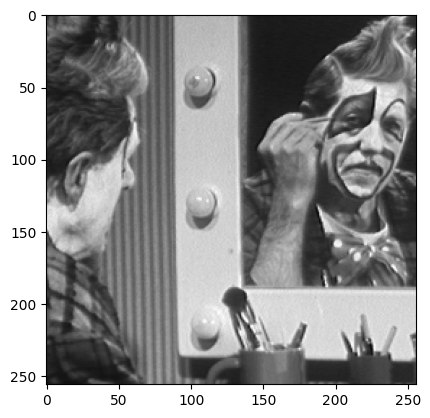

In [58]:
# code here
def laplace(img):
    h1 = np.array([[0, 1, 0],
                   [ 1, -4, 1],
                   [ 0,  1, 0]])

img1 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

3) Aplique o operador Sobel imagem original abaixo e obtenha as outras imagens conforme descrição. We can see that the intensity of many pixels on the surface is as high as along the actual edges. One reason is that the output of many edge pixels is greater than the maximum pixel value and therefore they are `cut off' at 255. To avoid this overflow we scale the range image by a factor 0.25 prior to the edge detection and then normalize the output, as can be seen in (c)

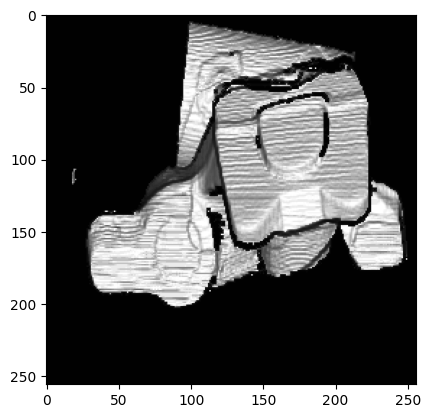

In [59]:
#code here
img1 = cv2.imread("ren1.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);


4) Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

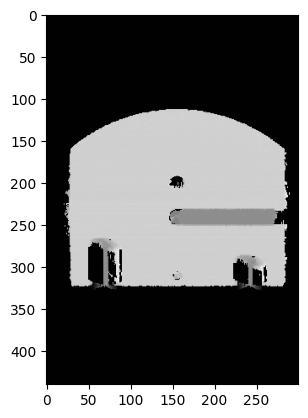

In [60]:

#code here
img1 = cv2.imread("ufo2.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

5) Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

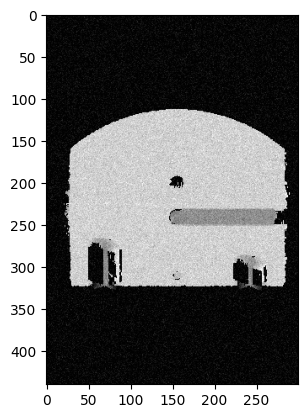

In [ ]:
#code here

#code here
img1 = cv2.imread("ufo2noi2.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);